In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils import np_utils
from keras.layers import Dense, Activation, Flatten, Dropout, Convolution2D, MaxPooling2D
from keras.models import Sequential

In [29]:
ds_train = pd.read_csv('./sign_mnist_train.csv')
ds_test = pd.read_csv('./sign_mnist_test.csv')

In [30]:
ds_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [31]:
data_train = ds_train.values
data_test = ds_test.values

3


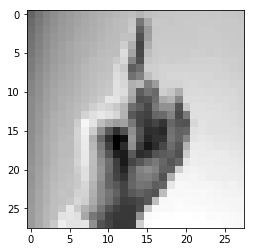

6


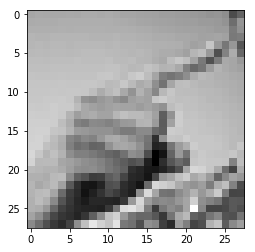

2


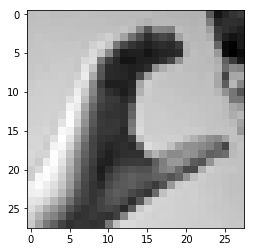

2


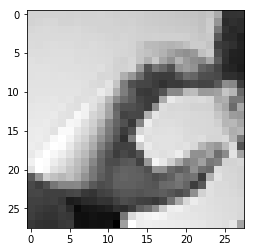

13


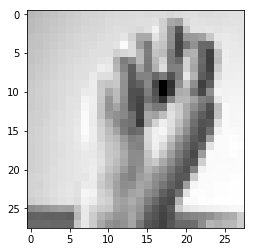

16


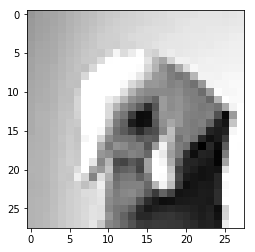

8


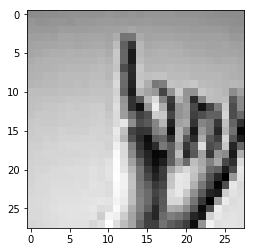

22


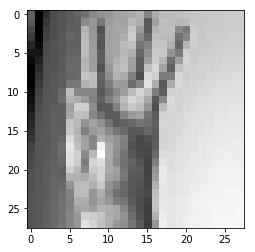

3


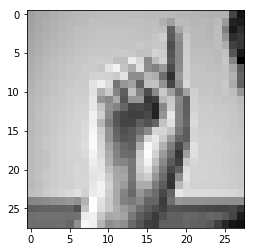

3


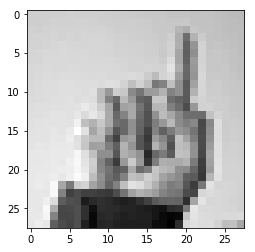

18


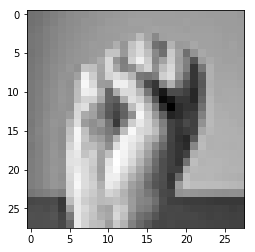

10


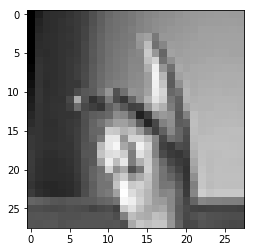

16


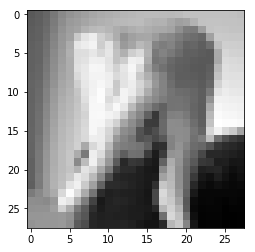

22


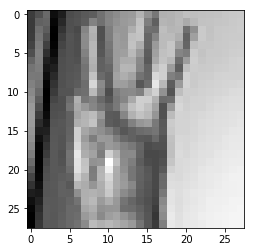

20


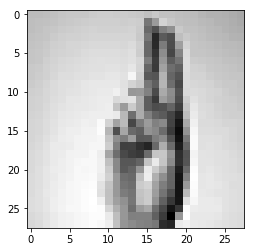

16


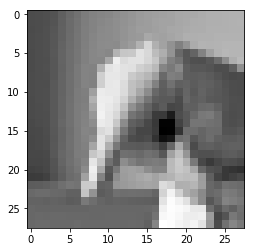

17


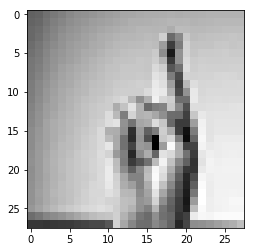

13


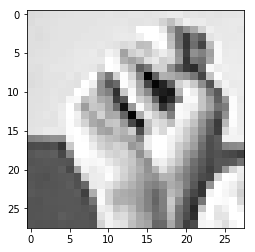

13


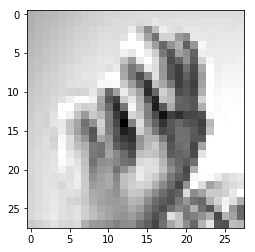

19


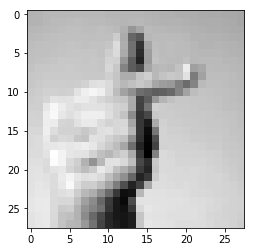

In [32]:
for ix in range(20):
    cur_pic = data_train[ix,1:]
    print data_train[ix,0]
    cur_pic = np.reshape(cur_pic, (28,28))
    plt.imshow(cur_pic,cmap='gray')
    plt.show()

In [33]:
x_train = data_train[:,1:]/255.0
y_train = data_train[:,0]
x_test = data_test[:,1:]/255.0
y_test = data_test[:,0]

In [34]:
print x_train.shape

(27455, 784)


In [35]:
print np.unique(y_test)

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [36]:
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
print y_train.shape
print y_test.shape

(27455, 25)
(7172, 25)


In [71]:
model = Sequential()

In [72]:
model.add( Dense( 1500, input_shape = (784,) ) )
model.add( Activation('relu') )
model.add( Dense( 1000 ) )
model.add( Activation('relu') )
model.add( Dense( 25 ) )
model.add( Activation('softmax') )

In [73]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1500)              1177500   
_________________________________________________________________
activation_28 (Activation)   (None, 1500)              0         
_________________________________________________________________
dense_29 (Dense)             (None, 1000)              1501000   
_________________________________________________________________
activation_29 (Activation)   (None, 1000)              0         
_________________________________________________________________
dense_30 (Dense)             (None, 25)                25025     
_________________________________________________________________
activation_30 (Activation)   (None, 25)                0         
Total params: 2,703,525
Trainable params: 2,703,525
Non-trainable params: 0
_________________________________________________________________


In [74]:
model.compile( optimizer='adam', loss = 'categorical_crossentropy', metrics=['accuracy'] )

In [75]:
model.fit(x_train, y_train,epochs=20,validation_data=(x_test,y_test))

Train on 27455 samples, validate on 7172 samples
Epoch 1/20
27455/27455 [==============================] - 53s 2ms/step - loss: 1.6070 - acc: 0.4795 - val_loss: 1.2595 - val_acc: 0.5906
Epoch 2/20
27455/27455 [==============================] - 56s 2ms/step - loss: 0.5817 - acc: 0.8053 - val_loss: 0.9310 - val_acc: 0.7221
Epoch 3/20
27455/27455 [==============================] - 57s 2ms/step - loss: 0.2880 - acc: 0.9031 - val_loss: 1.0138 - val_acc: 0.7150
Epoch 4/20
27455/27455 [==============================] - 59s 2ms/step - loss: 0.1434 - acc: 0.9557 - val_loss: 0.9788 - val_acc: 0.7450
Epoch 5/20
27455/27455 [==============================] - 61s 2ms/step - loss: 0.1224 - acc: 0.9613 - val_loss: 0.9703 - val_acc: 0.7776
Epoch 6/20
27455/27455 [==============================] - 56s 2ms/step - loss: 0.0456 - acc: 0.9875 - val_loss: 0.7597 - val_acc: 0.8419
Epoch 7/20
27455/27455 [==============================] - 53s 2ms/step - loss: 0.0760 - acc: 0.9753 - val_loss: 0.8468 - val_acc:

In [76]:
model.save('Gesture_Recognizing_Online.h5')